# Comparison of Regression Models (Conceptual)

The table below summarizes the key differences between Linear Regression, Multiple Linear Regression, Random Forest, and Gradient Boosting models.

| Model Type                  | Linear? | Handles Non-linearity? | Feature Interactions? | Interpretability | Typical Use |
|------------------------------|---------|----------------------|---------------------|-----------------|-------------|
| Linear Regression           | Yes     | No                   | No                  | High            | Baseline model for simple linear relationships |
| Multiple Linear Regression  | Yes     | No                   | No                  | High            | Baseline with multiple predictors |
| Random Forest Regressor     | No      | Yes                  | Yes                 | Medium          | General-purpose regression, robust to outliers |
| Gradient Boosting (XGB/LGB) | No      | Yes                  | Yes                 | Medium-Low      | High-accuracy regression, handles complex patterns |

---

## Quick Summary in Words:

- **Linear Regression:** Simple, interpretable, good for linear trends only.  
- **Multiple Linear Regression:** Uses multiple predictors, slightly more powerful than simple linear regression.  
- **Random Forest:** Ensemble of trees, handles non-linear relationships and feature interactions, robust and accurate.  
- **Gradient Boosting (XGBoost / LightGBM):** Sequential ensemble of trees, best for high-accuracy predictions, especially with hyperparameter tuning.



# **Imports**





In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data has area wise distrbution of cost in a perticular area

In [80]:
df = pd.read_csv('/content/housing.csv')

In [81]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

##### 1. We have to predict here median_house_value so it will be output value and other will be acting as input value
##### 2. About this file
```
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea
```

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [84]:
df.shape

(20640, 10)

Based on the output of `df.info()`:

**Numerical Columns:**
*   `longitude` (float64)
*   `latitude` (float64)
*   `housing_median_age` (float64)
*   `total_rooms` (float64)
*   `total_bedrooms` (float64)
*   `population` (float64)
*   `households` (float64)
*   `median_income` (float64)
*   `median_house_value` (float64)

**Categorical Columns:**
*   `ocean_proximity` (object)

There are no columns that appear to be mixed based on the provided information.

# **EDA**

# Result Of Univariate Analysis (Numerical Columns)

##### 1.total_bedrooms 20433 others have 20640
##### 2.Since only 1% is missing, you should fill the missing values, not drop.

In [85]:
print(df['total_bedrooms'].isnull().sum())

207


In [86]:
print(df['total_bedrooms'].skew()) # highly positively skewed Use the median

3.459546331523342


In [87]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

/tmp/ipython-input-1492620623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**1. housing_median_age**

```
1.Based on the box plot for housing_median_age, it appears that there are no significant outliers displayed.
2.This is because the data points outside of the whiskers (which typically extend to 1.5 times the interquartile range) are considered outliers.
3.In this case, all data points fall within that range, so no individual outliers are marked on the plot.
```

In [89]:
print(df['housing_median_age'].skew()) # it is not skewed data

0.060330637599136865


<Axes: ylabel='Frequency'>

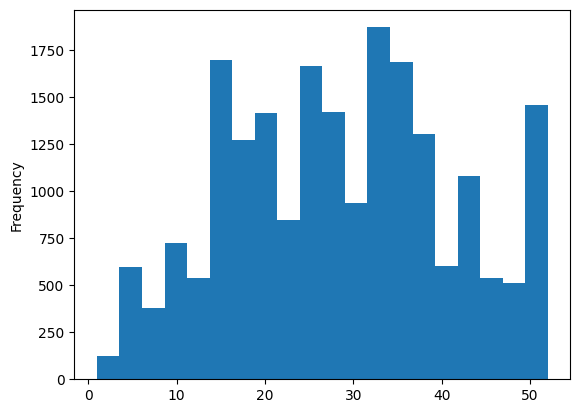

In [90]:
df['housing_median_age'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

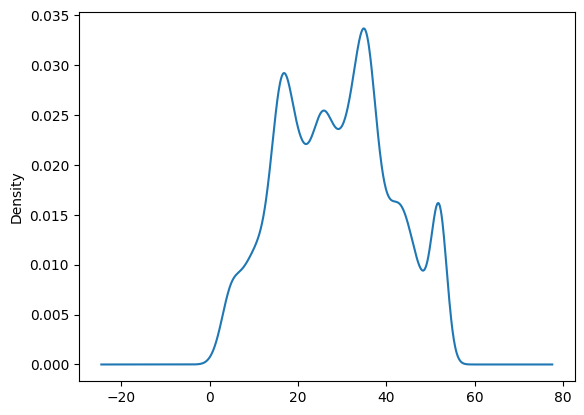

In [91]:
df['housing_median_age'].plot(kind='kde') # To check how total_rooms.

<Axes: >

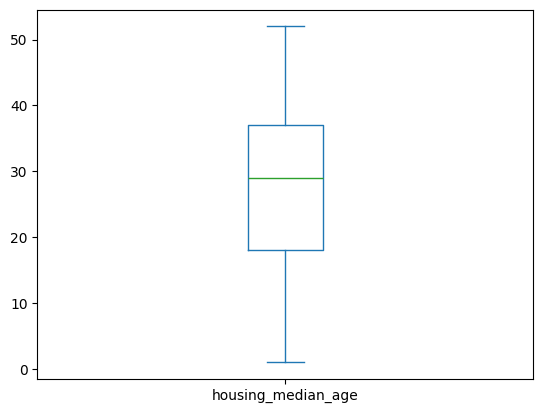

In [92]:
df['housing_median_age'].plot(kind='box') # To check outlier

**2. total_rooms**

```
1.Based on the total_rooms are having higly skewed
2.There are many outlier
```

In [93]:
print(df['total_rooms'].skew()) # it is highly skewed data

4.147343450632158


<Axes: ylabel='Frequency'>

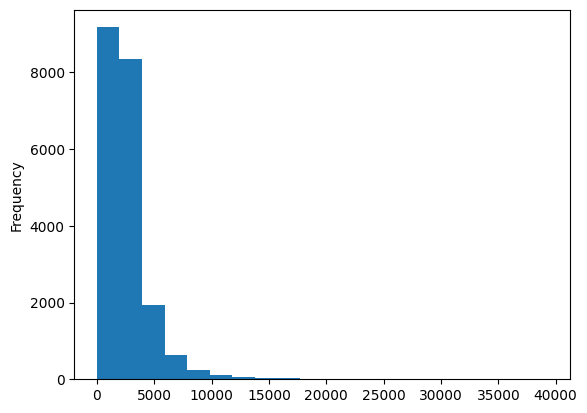

In [94]:
df['total_rooms'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

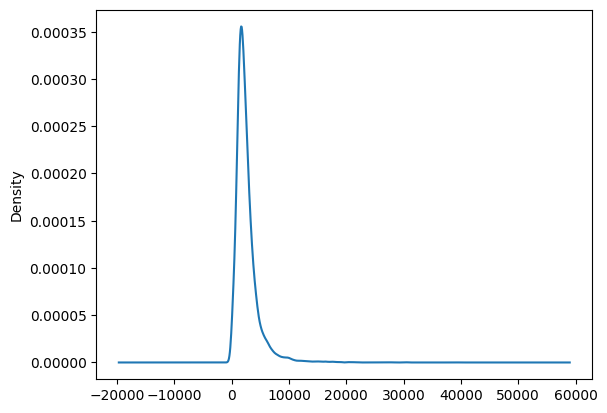

In [95]:
df['total_rooms'].plot(kind='kde') # To check how total_rooms .

<Axes: >

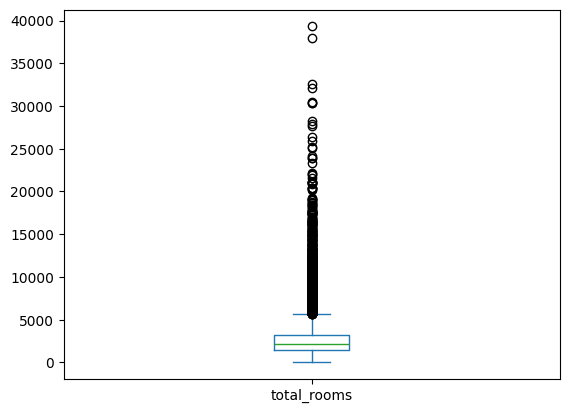

In [96]:
df['total_rooms'].plot(kind='box') # To check outlier has many outliers

**3. total_bedrooms**

```
1.Based on the total_bedrooms are having higly skewed
2.There are many outlier
```

In [97]:
print(df['total_bedrooms'].skew()) # it is highly skewed data


3.4770233756335105


<Axes: ylabel='Frequency'>

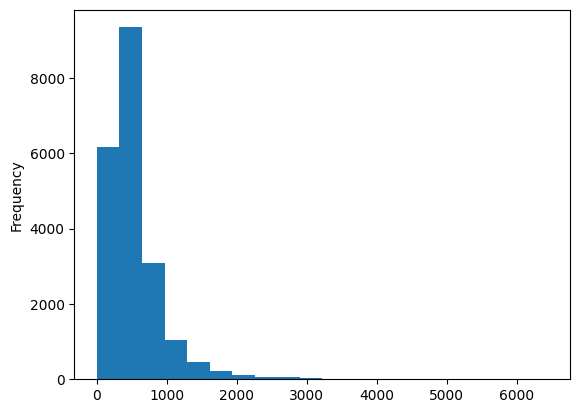

In [98]:
df['total_bedrooms'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

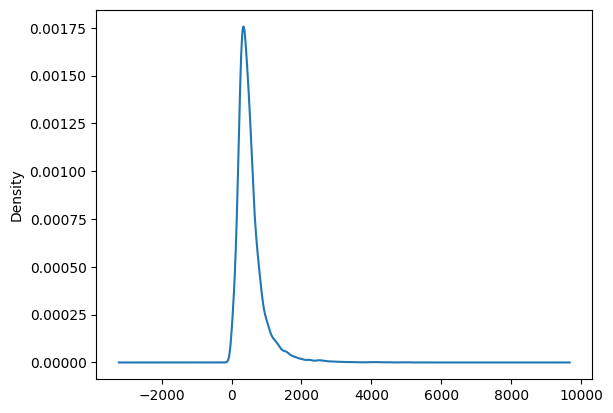

In [99]:
df['total_bedrooms'].plot(kind='kde') # To check how total_bedrooms.

<Axes: >

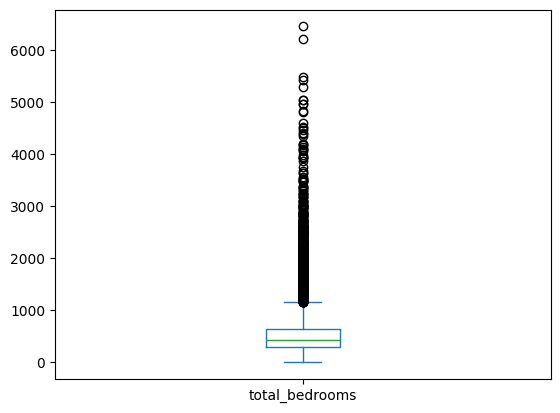

In [100]:
df['total_bedrooms'].plot(kind='box') # To check outlier has many outliers

**4. population**

```
1.Based on the population are having higly skewed
2.There are many outlier
```

In [101]:
print(df['population'].skew()) # it is highly skewed data

4.93585822672712


<Axes: ylabel='Frequency'>

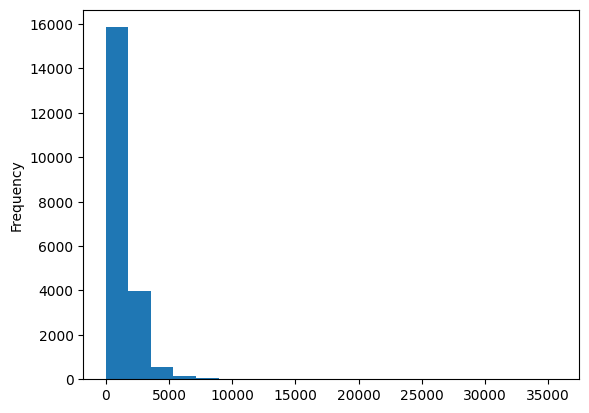

In [102]:
df['population'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

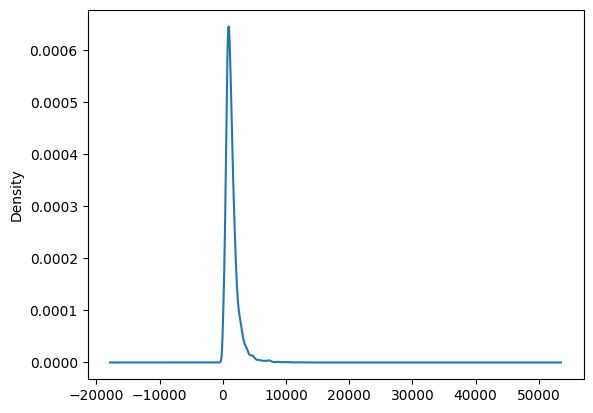

In [103]:
df['population'].plot(kind='kde') # To check how population.

<Axes: >

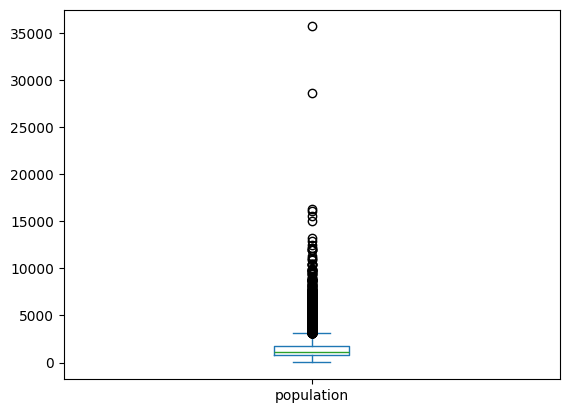

In [104]:
df['population'].plot(kind='box') # To check outlier has many outliers

**5. households**

```
1.Based on the households are having skewed
2.There are many outlier
```

In [105]:
print(df['households'].skew()) # it is skewed data

3.410437711667147


<Axes: ylabel='Frequency'>

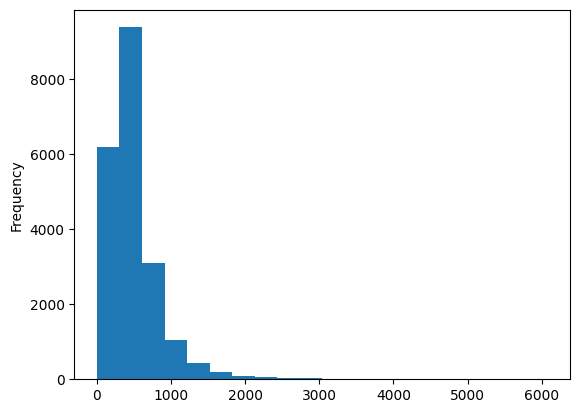

In [106]:
df['households'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

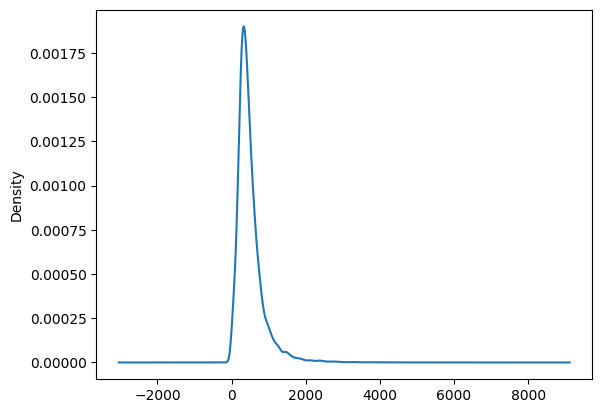

In [107]:
df['households'].plot(kind='kde') # To check how households is distribution.

<Axes: >

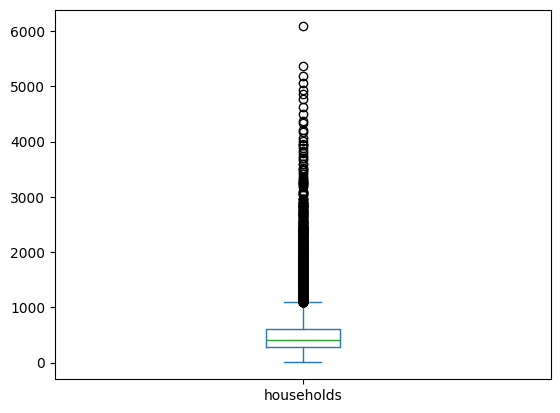

In [108]:
df['households'].plot(kind='box') # To check outlier has many outliers

**6. median_income**

```
1.Based on the median_income are having skewed
2.There are many outlier
```

In [109]:
print(df['median_income'].skew()) # it is skewed data

1.6466567021344465


<Axes: ylabel='Frequency'>

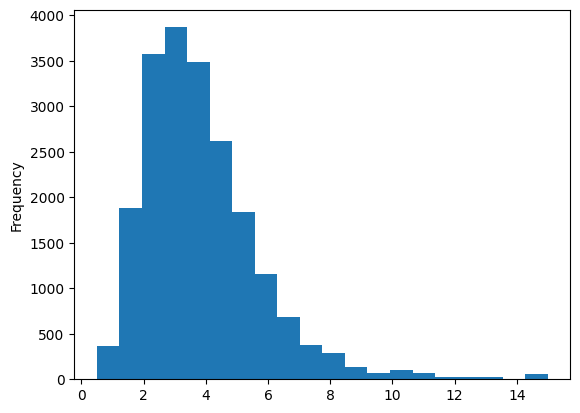

In [110]:
df['median_income'].plot(kind='hist' , bins=20) # To visualize the number of total_rooms.

<Axes: ylabel='Density'>

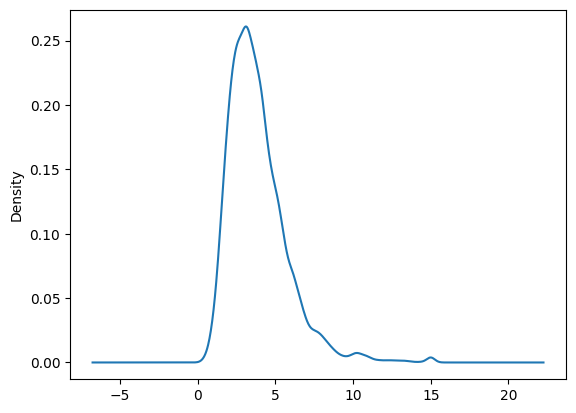

In [111]:
df['median_income'].plot(kind='kde') # To check how median_income is distribution.

<Axes: >

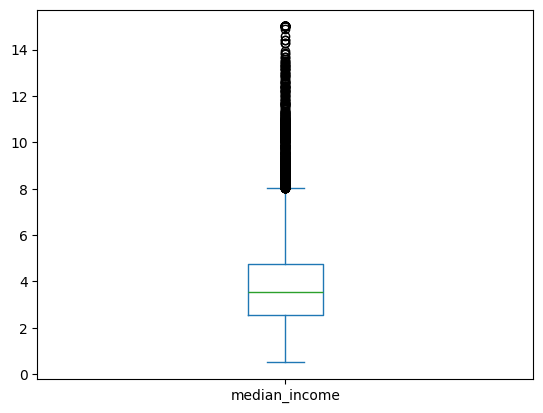

In [112]:
df['median_income'].plot(kind='box') # To check outlier has many outliers

**7. median_house_value**

```
1.Data is not highly skewed
2.Data has many outlier
```

In [113]:
print(df['median_house_value'].skew()) # it is less skewed data

0.9777632739098341


<Axes: ylabel='Frequency'>

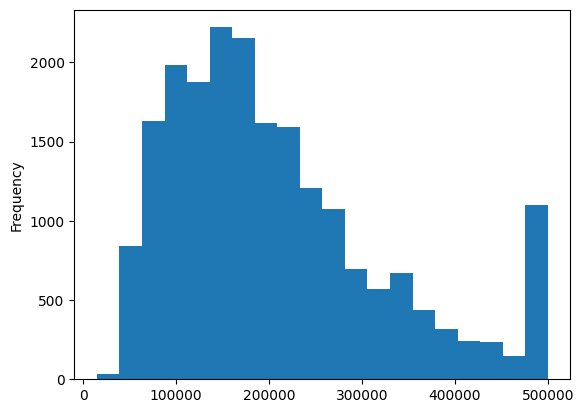

In [114]:
df['median_house_value'].plot(kind='hist' , bins=20) # To visualize the number of median_house_value ther is sudden hypye at last.

<Axes: ylabel='Density'>

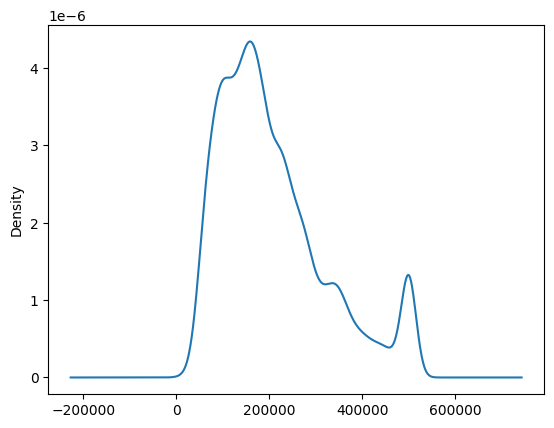

In [115]:
df['median_house_value'].plot(kind='kde') # To check how median_house_value is not distribution.

<Axes: >

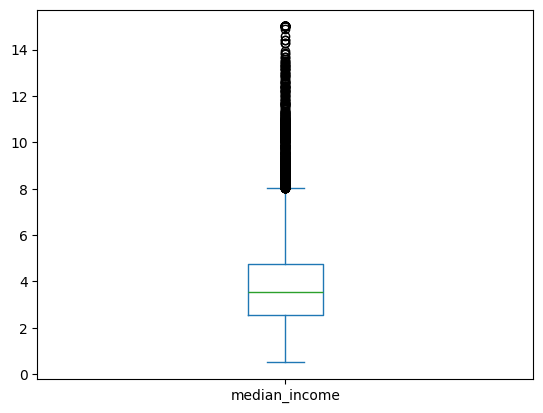

In [116]:
df['median_income'].plot(kind='box') # To check outlier has many outliers

In [117]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Initialize an empty list to store indices of outliers
outlier_indices = []

# Iterate through each numerical column to find outliers
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the indices of outliers in the current column
    col_outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

    # Add the outlier indices to the list
    outlier_indices.extend(col_outlier_indices)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

# Drop the rows with outliers from the DataFrame
df_cleaned = df.drop(outlier_indices).reset_index(drop=True)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

Original DataFrame shape: (20640, 10)
DataFrame shape after outlier removal: (17609, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.24     37.85                52.0       1467.0           190.0   
1    -122.25     37.85                52.0       1274.0           235.0   
2    -122.25     37.85                52.0       1627.0           280.0   
3    -122.25     37.85                52.0        919.0           213.0   
4    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0       496.0       177.0         7.2574            352100.0        NEAR BAY  
1       558.0       219.0         5.6431            341300.0        NEAR BAY  
2       565.0       259.0         3.8462            342200.0        NEAR BAY  
3       413.0       193.0         4.0368            269700.0        NEAR BAY  
4      1094.0       514.0         3.6591            299200.0        NEAR BAY

# Result Of Univariate Analysis (Categorical Columns)

**1. ocean_proximity**

    

```
1. Most of people live in <1H OCEAN & INLAND.
2. ISLAND has most les people liveing
```

In [118]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity'>

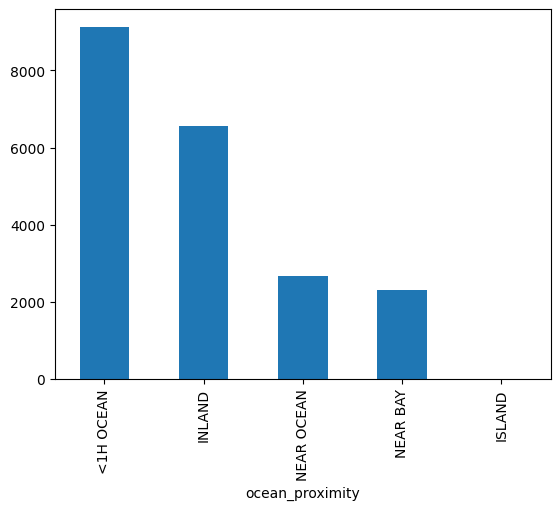

In [119]:
df['ocean_proximity'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

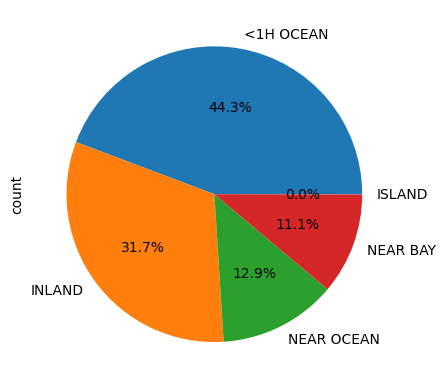

In [120]:
df['ocean_proximity'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

In [121]:
print(df['ocean_proximity'].isnull().sum())

0


# Result Of Bivariate Analysis

## Correlation matrix and heatmap



In [122]:
from sklearn.model_selection import train_test_split

x= df.drop('median_house_value',axis=1)
y=df['median_house_value']

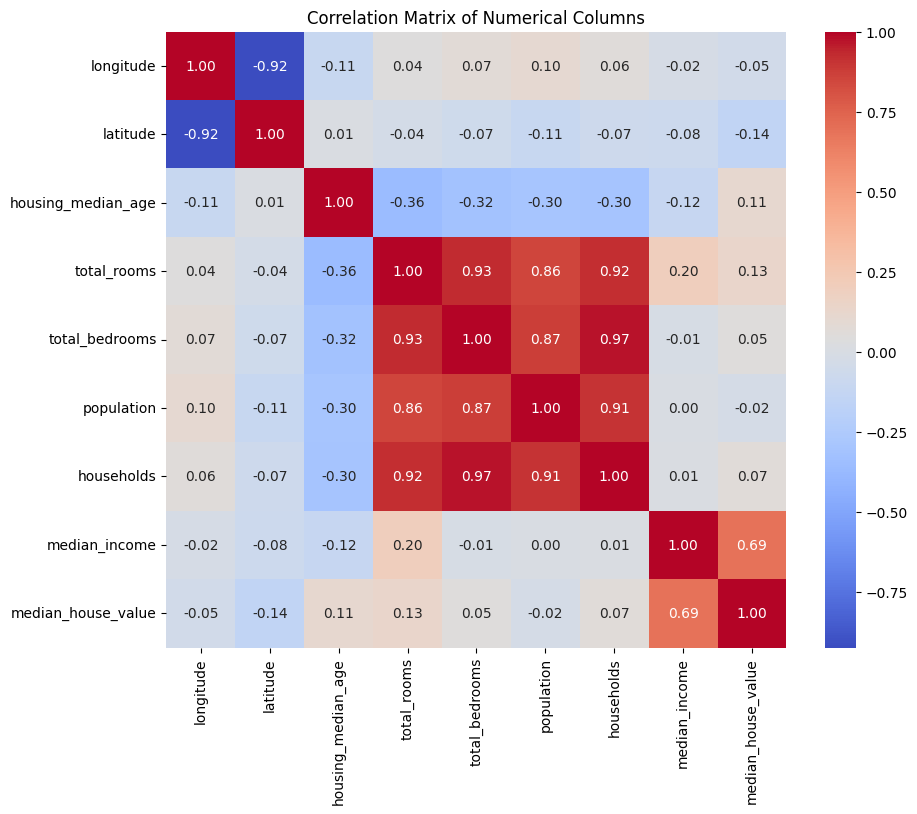

In [123]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## latitude logitude scatter plot


<Axes: xlabel='latitude', ylabel='longitude'>

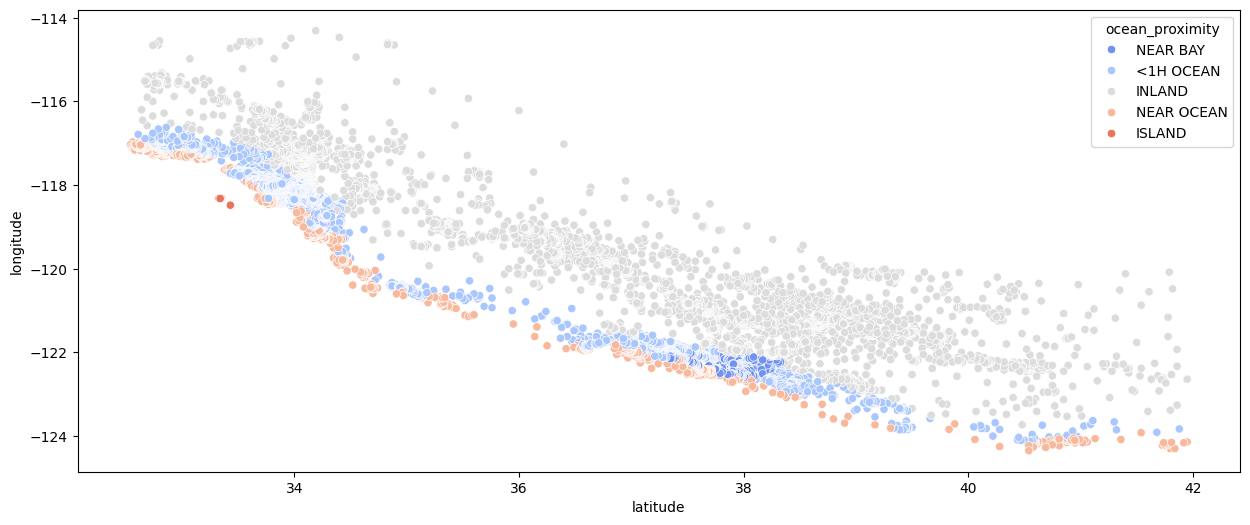

In [126]:
plt.figure(figsize=(15, 6)) # Just to see location
sns.scatterplot(x="latitude",y="longitude",data=df,hue="ocean_proximity",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

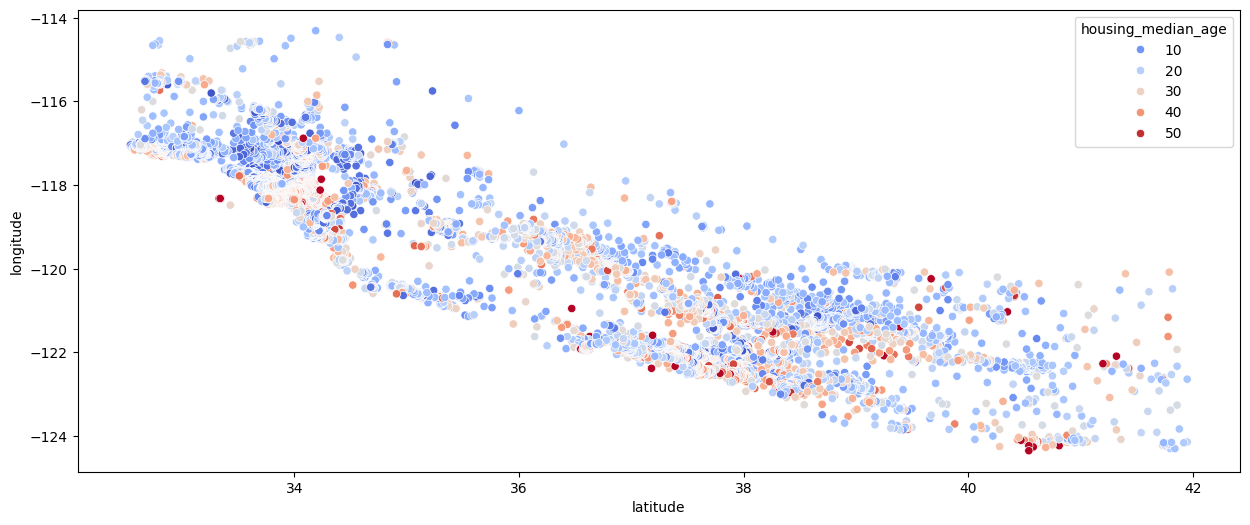

In [127]:
plt.figure(figsize=(15, 6)) # House age are randomly distributed
sns.scatterplot(x="latitude",y="longitude",data=df,hue="housing_median_age",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

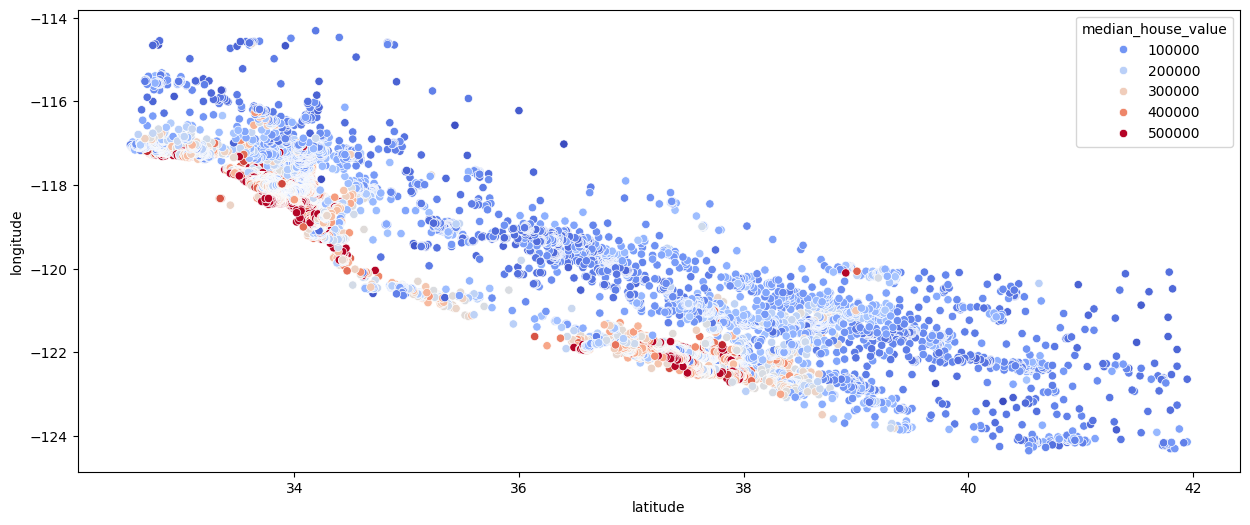

In [128]:
plt.figure(figsize=(15, 6)) # House at base area are more costly
sns.scatterplot(x="latitude",y="longitude",data=df,hue="median_house_value",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

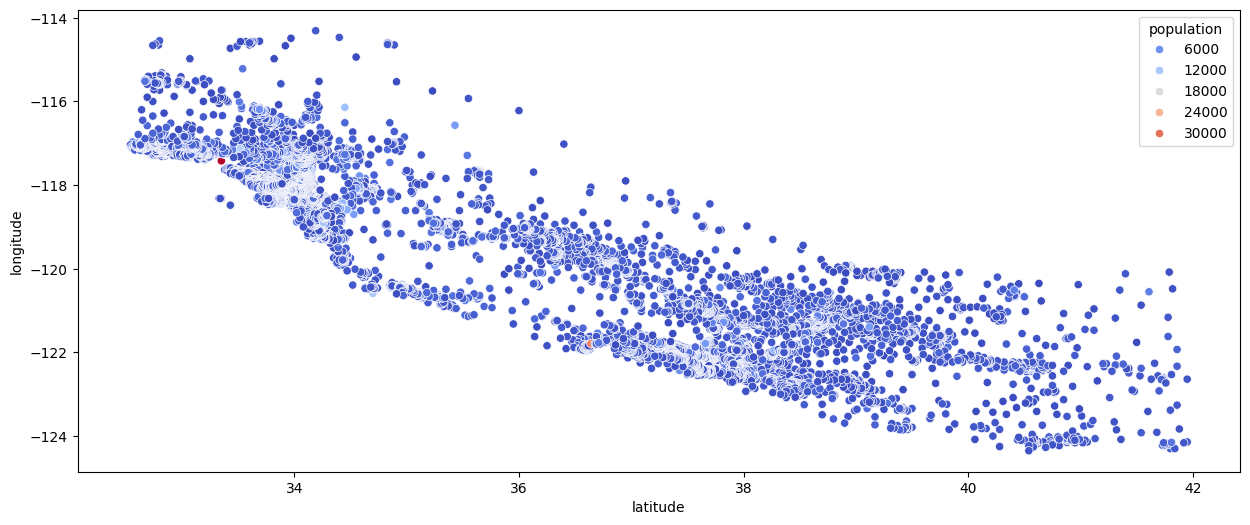

In [129]:
plt.figure(figsize=(15, 6)) # Population is evenly distributed but in some bay area there are small
sns.scatterplot(x="latitude",y="longitude",data=df,hue="population",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

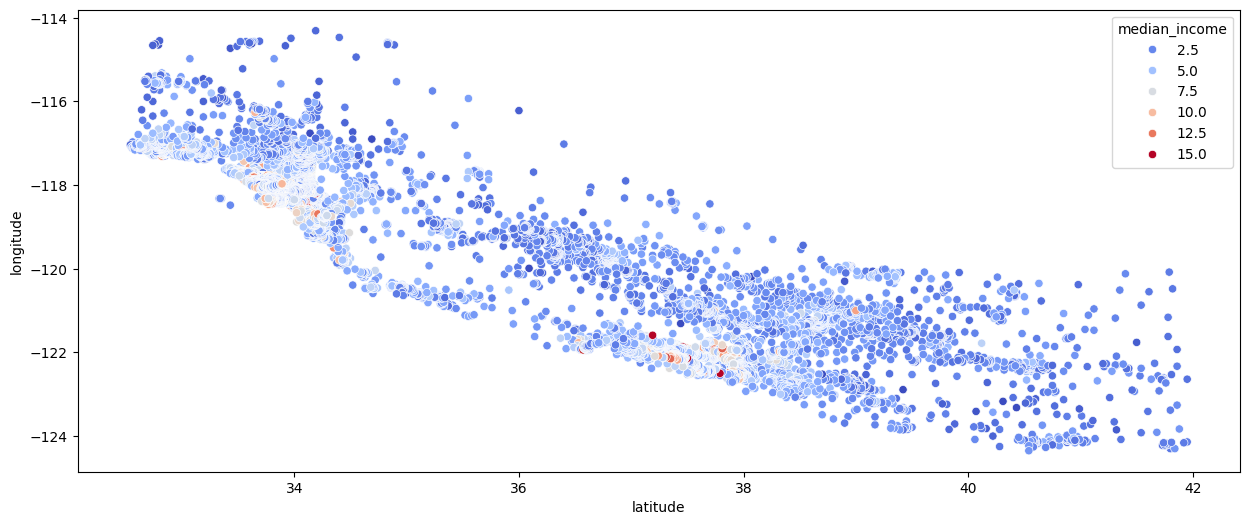

In [130]:
plt.figure(figsize=(15, 6)) # Some people in bay area earn more
sns.scatterplot(x="latitude",y="longitude",data=df,hue="median_income",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

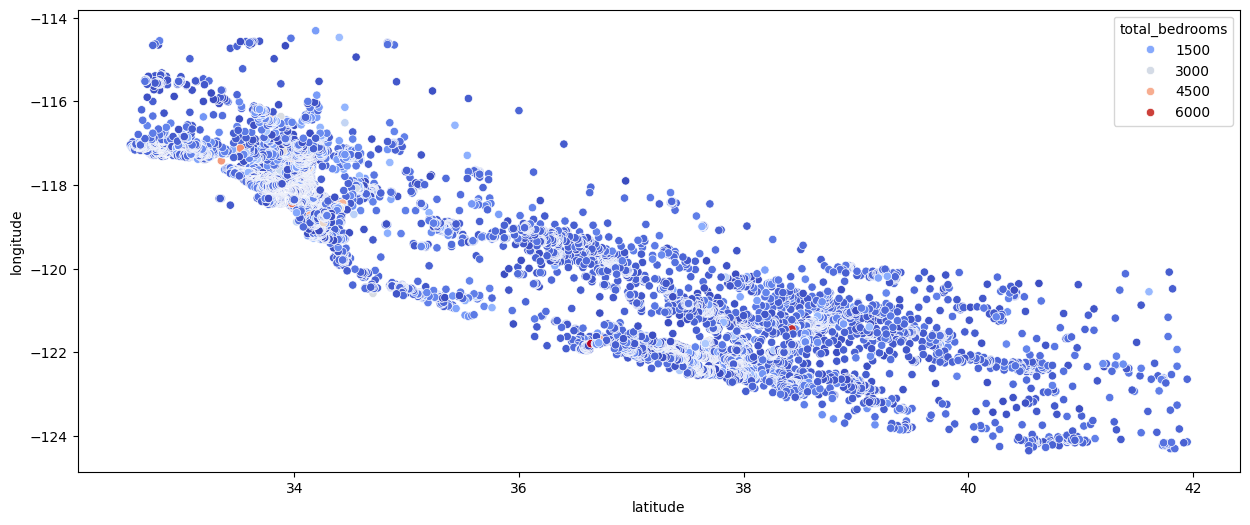

In [131]:
plt.figure(figsize=(15, 6)) # no data
sns.scatterplot(x="latitude",y="longitude",data=df,hue="total_bedrooms",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

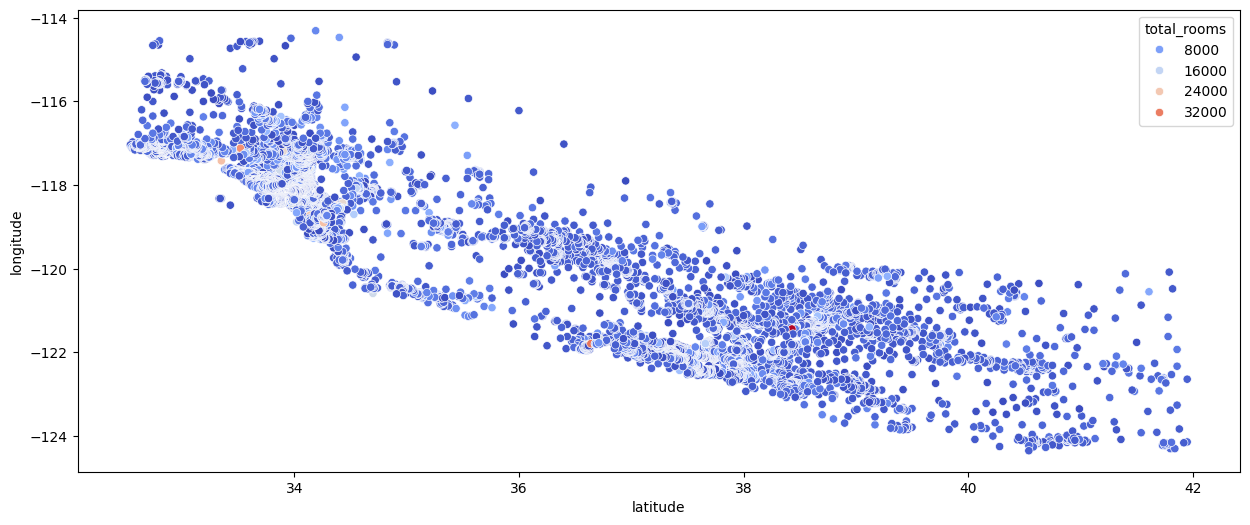

In [132]:
plt.figure(figsize=(15, 6)) # no data
sns.scatterplot(x="latitude",y="longitude",data=df,hue="total_rooms",palette="coolwarm")

## Feature Engineering

In [133]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

In [134]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                          False                   False   
1                          False                   False   
2                          False                   False   
3                          False                   False   
4                          False                   False   
...                          ...                     ...   
20635                      False                    True   
20636                      False                    True   
20637                      False                    True   
20638                      False                    True   
20639                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20635                       False  
20636                       False  
20637                       False  
20638                       False  
20639                       False  

[20640 rows x 14 columns]

In [135]:
df['bedroom_ratio'] = df['total_bedrooms']/df['total_rooms']
df['household_rooms'] = df['total_rooms']/df['households']
# df['population_per_household'] = df['population']/df['households'] will not be good as area is important

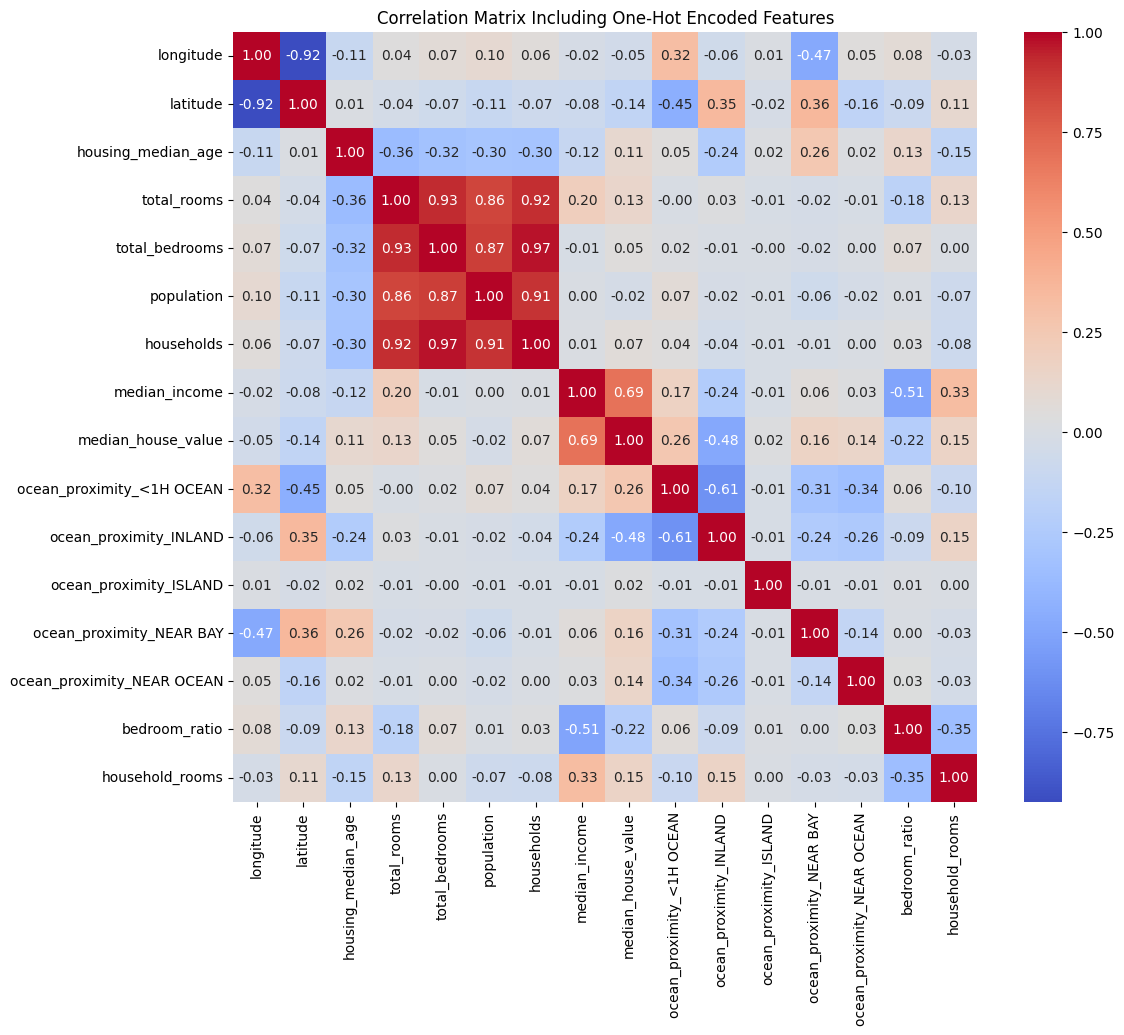

In [136]:
# Calculate the correlation matrix including all columns
correlation_matrix_encoded = df.corr(numeric_only=True)

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including One-Hot Encoded Features')
plt.show()

# Interpretation of  Analysis

---

## Correlation Matrix and Heatmap Analysis

**Key Observations:**

- There is a strong positive correlation between `total_rooms`, `total_bedrooms`, `population`, and `households`.  
  This is expected since these features describe the size and occupancy of a block.
- `median_income` shows a moderate positive correlation with `median_house_value` (~0.69),  
  suggesting that higher income areas tend to have higher house values.
- `housing_median_age` has a weak positive correlation with `median_house_value` (~0.11).
- `latitude` and `longitude` show a strong negative correlation (~-0.92), which is expected as they represent geographical coordinates.
- Other correlations are relatively weak.

---

## Scatter Plot Analysis

**Observations:**

- Scatter plots for strongly correlated pairs like `total_rooms` vs `total_bedrooms` and `population` vs `households` show clear linear trends, confirming the positive correlations seen in the heatmap.
- The scatter plot of `median_income` vs `median_house_value` shows a positive relationship, but with wide spread, indicating that income is a major factor but not the only one influencing house prices.
- The scatter plots of `latitude` and `longitude` reveal clear geographic distribution patterns.
- Scatter plots of weakly correlated pairs show no distinct linear relationship, as expected.

---



## Summary of Significant Relationships and Patterns

- `median_income` has the strongest linear correlation with `median_house_value`.
- `latitude` and `longitude` are strongly correlated, as expected.
- `ocean_proximity` is a key categorical variable influencing:
  - `median_house_value`
  - `median_income`
  - Housing scale features (`total_rooms`, `total_bedrooms`, `population`, `households`)
- Features representing block size (`total_rooms`, `total_bedrooms`, `population`, `households`) are highly intercorrelated.


### Data Analysis Key Findings

*   There is a strong positive correlation (around 0.69) between `median_income` and `median_house_value`, indicating that areas with higher median incomes tend to have higher median house values.
*   Features related to the size and occupancy of a block (`total_rooms`, `total_bedrooms`, `population`, `households`) are strongly positively correlated with each other.
*   `latitude` and `longitude` show a strong negative correlation (around -0.92), which is expected given they are geographical coordinates.
*   The categorical variable `ocean_proximity` has a significant impact on `median_house_value` and `median_income`. Areas labeled 'NEAR BAY' and '<1H OCEAN' generally show higher median house values and incomes compared to 'INLAND'.

### Insights or Next Steps

*   `median_income` and `ocean_proximity` appear to be important predictors for `median_house_value` and should be strongly considered in subsequent modeling steps.
*   Given the high inter-correlation among size-related features (`total_rooms`, `total_bedrooms`, `population`, `households`), dimensionality reduction or feature engineering (e.g., calculating ratios) might be beneficial to avoid multicollinearity in modeling.


# Data Spiliting

In [137]:
from sklearn.model_selection import train_test_split

x= df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
train_data = X_train.join(y_train)

In [140]:
display(df.tail())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
20635                      False                    True   
20636                      False                    True   
20637                      False                    True   
20638                      False                    True   
20639                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  bedroom_ratio  household_rooms  
20635                       False       0.224625         5.045455  
20636                       False       0.215208         6.114035  
20637                       False       0.215173         5.205543  
20638                       False       0.219892         5.329513  
20639                       False       0.221185         5.254717

In [141]:
X_train,y_train = train_data.drop('median_house_value',axis=1),train_data['median_house_value']

In [142]:
X_train[['median_income']]

median_income
14196         3.2596
8267          3.8125
17445         4.1563
14265         1.9425
2271          3.5542
...              ...
11284         6.3700
11964         3.0500
5390          2.9344
860           5.7192
15795         2.5755

[16512 rows x 1 columns]

# Simple Linear Regression Model

🔹 Linear Regression Model Evaluation
R² Score: 0.45885918903846656
MAE: 62990.86530093761
MSE: 7091157771.76555
RMSE: 84209.01241414454
Average Prediction Accuracy: 60.94%


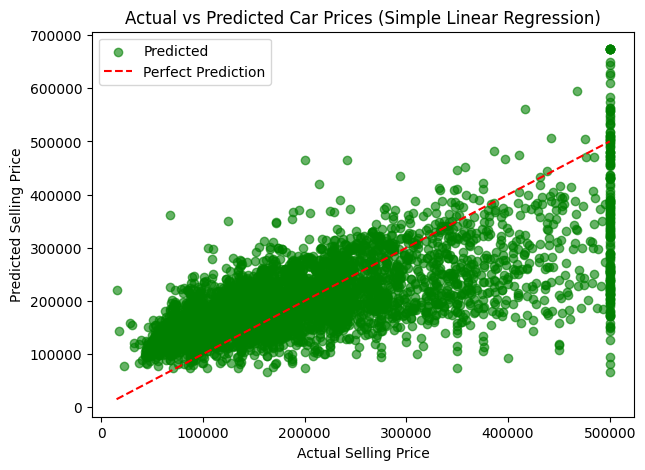

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 Linear Regression Model Evaluation")

# Use only Present_Price as feature
X_simple = X_train[['median_income']]
X_simple_test = X_test[['median_income']]

# Train the model
lr_simple = LinearRegression()
lr_simple.fit(X_simple, y_train)

# Predictions
y_pred_simple = lr_simple.predict(X_simple_test)

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

# Accuracy Calculation (inline)
accuracies = 100 * (1 - np.abs(y_test - y_pred_simple) / y_test)
accuracy = np.mean(accuracies)
print(f"Average Prediction Accuracy: {accuracy:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_simple, color='green', alpha=0.6, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Simple Linear Regression)")
plt.legend()
plt.show()

#Multiple Linear Regression

🔹 Multiple Linear Regression (All Features)
R² Score: 0.5748759768584555
MAE: 51480.57634920917
MSE: 5570863367.90572
RMSE: 74638.21653754677
Average Prediction Accuracy: 69.56%


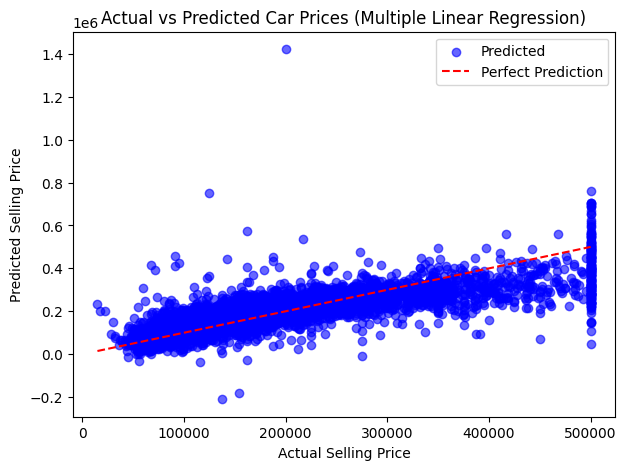

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 Multiple Linear Regression (All Features)")

# Train the model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train) # parameters

# Predictions
y_pred_multi = lr_multi.predict(X_test) # predicts on test dataset

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_multi))
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))

# Accuracy Calculation (inline)
accuracies = 100 * (1 - np.abs(y_test - y_pred_multi) / y_test)
accuracy = np.mean(accuracies)
print(f"Average Prediction Accuracy: {accuracy:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Multiple Linear Regression)")
plt.legend()
plt.show()


# Accuracy incresess that good but not more that 10% so lets try to drop featured Engineered

#Linear Regression after removing

In [145]:
from sklearn.model_selection import train_test_split

x= df.drop('median_house_value',axis=1)
y= df['median_house_value']

In [146]:
x

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0           322.0       126.0         8.3252                      False   
1          2401.0      1138.0         8.3014                      False   
2           496.0       177.0         7.2574                      False   
3           558.0       219.0         5.6431                      False   
4           565.0       259.0         3.8462                      False   
...           ...         ...            ...                        ...   
20635       845.0       330.0         1.5603                      False   
20636       356.0       114.0         2.5568                      False   
20637      1007.0       433.0         1.7000                      False   
20638       741.0       349.0         1.8672                      False   
20639      1387.0       530.0         2.3886                      False   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
20635                    True                   False   
20636                    True                   False   
20637                    True                   False   
20638                    True                   False   
20639                    True                   False   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  bedroom_ratio  \
0                          True                       False       0.146591   
1                          True                       False       0.155797   
2                          True                       False       0.129516   
3                          True                       False       0.184458   
4                          True                       False       0.172096   
...                         ...                         ...            ...   
20635                     False                       False       0.224625   
20636                     False                       False       0.215208   
20637                     False                       False       0.215173   
20638                     False                       False       0.219892   
20639                     False                       False       0.221185   

       household_rooms  
0             6.984127  
1             6.238137  
2             8.288136  
3             5.817352  
4             6.281853  
...                ...  
20635         5.045455  
20636         6.114035  
20637         5.205543  
20638         5.329513  
20639         5.254717  

[20640 rows x 15 columns]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

🔹 Linear Regression Model Evaluation
R² Score: 0.45885918903846656
MAE: 62990.86530093761
MSE: 7091157771.76555
RMSE: 84209.01241414454
Average Prediction Accuracy: 60.94%


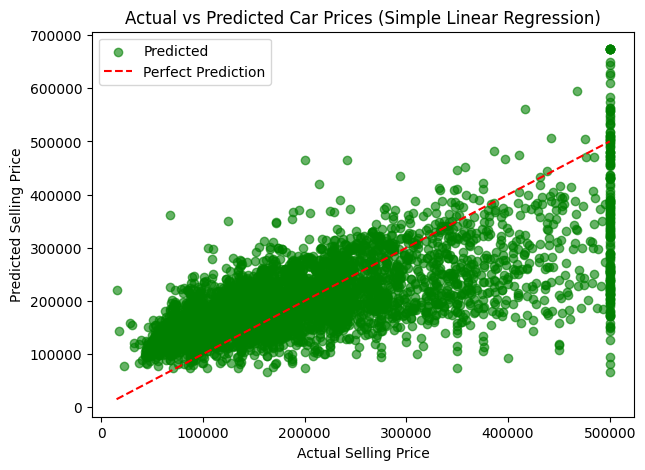

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 Linear Regression Model Evaluation")

# Use only Present_Price as feature
X_simple = X_train[['median_income']]
X_simple_test = X_test[['median_income']]

# Train the model
lr_simple = LinearRegression()
lr_simple.fit(X_simple, y_train)

# Predictions
y_pred_simple = lr_simple.predict(X_simple_test)

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

# Accuracy Calculation (inline)
accuracies = 100 * (1 - np.abs(y_test - y_pred_simple) / y_test)
accuracy = np.mean(accuracies)
print(f"Average Prediction Accuracy: {accuracy:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_simple, color='green', alpha=0.6, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Simple Linear Regression)")
plt.legend()
plt.show()

#Multiple Linear Regression after removing

🔹 Multiple Linear Regression 
R² Score: 0.5748759768584555
MAE: 51480.57634920917
MSE: 5570863367.90572
RMSE: 74638.21653754677
Average Prediction Accuracy: 69.56%


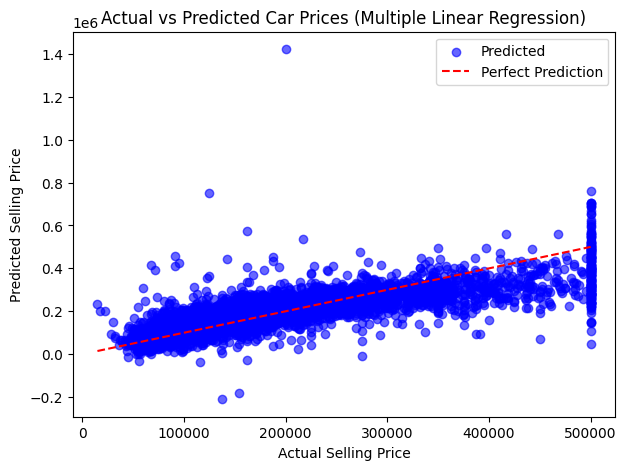

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 Multiple Linear Regression ")

# Train the model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train) # parameters

# Predictions
y_pred_multi = lr_multi.predict(X_test) # predicts on test dataset

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_multi))
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))

# Accuracy Calculation (inline)
accuracies = 100 * (1 - np.abs(y_test - y_pred_multi) / y_test)
accuracy = np.mean(accuracies)
print(f"Average Prediction Accuracy: {accuracy:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Multiple Linear Regression)")
plt.legend()
plt.show()


#Hyper parameter

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [151]:
# Create a dictionary with the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# 1. Instantiate a LinearRegression model
lr = LinearRegression()

# 2. Instantiate a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# 3. Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# 4. Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': False}


🔹 Tuned Multiple Linear Regression Evaluation:
R² Score: 0.5749
MAE: 51480.5763
MSE: 5570863367.9057
RMSE: 74638.2165
Average Prediction Accuracy: 69.56%


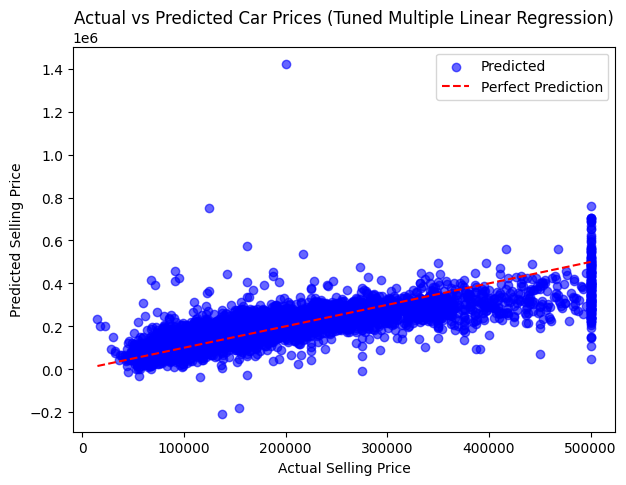

In [152]:
# Get the best model
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_lr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)

print("🔹 Tuned Multiple Linear Regression Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Accuracy Calculation
accuracies_tuned = 100 * (1 - np.abs(y_test - y_pred_tuned) / y_test)
accuracy_tuned = np.mean(accuracies_tuned)
print(f"Average Prediction Accuracy: {accuracy_tuned:.2f}%")

# Visualization for the tuned model
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_tuned, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Tuned Multiple Linear Regression)")
plt.legend()
plt.show()

##### ***No Difference after hyperparameter tunning lets try Random Forest***

# Random Forest Regressor

🔹 Random Forest Regressor Evaluation
R² Score: 0.8102294710669175
MAE: 32260.928723352714
MSE: 2486770049.194358
RMSE: 49867.52499567587
Average Prediction Accuracy: 81.73%


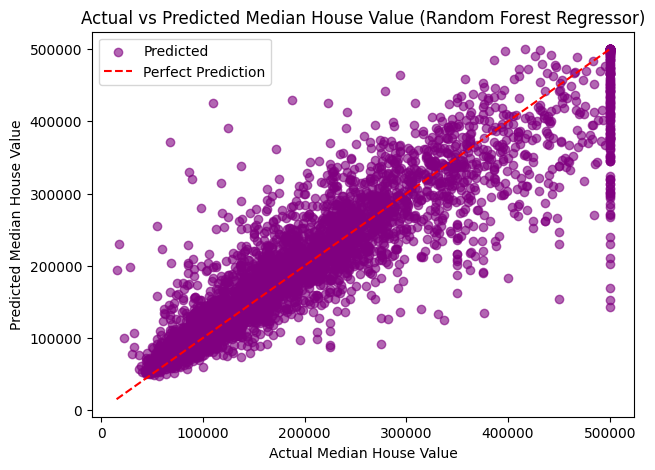

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 Random Forest Regressor Evaluation")

# Instantiate the Random Forest Regressor model
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Accuracy Calculation (inline)
accuracies_rf = 100 * (1 - np.abs(y_test - y_pred_rf) / y_test)
accuracy_rf = np.mean(accuracies_rf)
print(f"Average Prediction Accuracy: {accuracy_rf:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (Random Forest Regressor)")
plt.legend()
plt.show()

# Random Forest Regressor with Hyperper Tunning

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]   # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search_rf.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)

print("\n🔹 Tuned Random Forest Regressor Evaluation:")
print(f"R² Score: {r2_tuned_rf:.4f}")
print(f"MAE: {mae_tuned_rf:.4f}")
print(f"MSE: {mse_tuned_rf:.4f}")
print(f"RMSE: {rmse_tuned_rf:.4f}")

# Accuracy Calculation for tuned model
accuracies_tuned_rf = 100 * (1 - np.abs(y_test - y_pred_tuned_rf) / y_test)
accuracy_tuned_rf = np.mean(accuracies_tuned_rf)
print(f"Average Prediction Accuracy: {accuracy_tuned_rf:.2f}%")

# Visualization for the tuned model
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_tuned_rf, color='purple', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (Tuned Random Forest Regressor)")
plt.legend()
plt.show()

KeyboardInterrupt: 

Taking very much time waited 1 hr 3 times


#XGBoost

🔹 XGBoost Regressor Evaluation
R² Score: 0.7991519211422248
MAE: 34635.792634712634
MSE: 2631931257.9766498
RMSE: 51302.35138837839
Average Prediction Accuracy: 80.40%


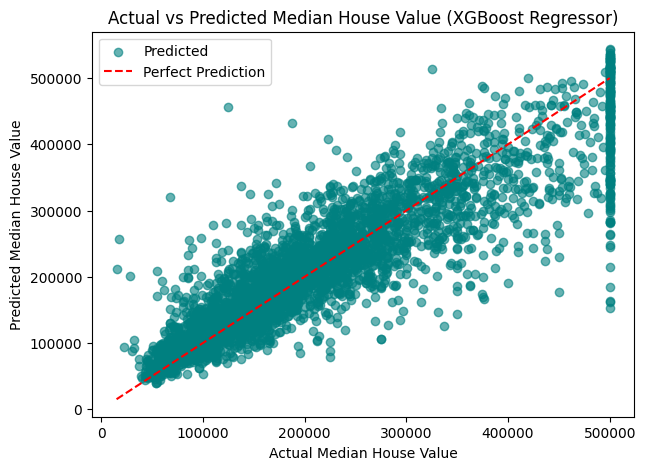

In [155]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("🔹 XGBoost Regressor Evaluation")

# Instantiate the XGBoost Regressor model
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=5,
                        random_state=42)

# Train the model
# Clean up column names to remove problematic characters for XGBoost
X_train.columns = X_train.columns.str.replace('[<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[<>]', '', regex=True)

xgbr.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgbr.predict(X_test)

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# Accuracy Calculation (inline)
accuracies_xgb = 100 * (1 - np.abs(y_test - y_pred_xgb) / y_test)
accuracy_xgb = np.mean(accuracies_xgb)
print(f"Average Prediction Accuracy: {accuracy_xgb:.2f}%")

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_xgb, color='teal', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (XGBoost Regressor)")
plt.legend()
plt.show()

# XGBoost Regressor with Hyperparameter Tuning

XGBoost Regressor with Hyperparameter Tuning
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters Found:
{'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}

Model Performance Metrics:
R² Score: 0.8440486319135946
MAE: 29631.93478038699
MSE: 2043600729.0937698
RMSE: 45206.202329921165
Average Prediction Accuracy: 83.18%


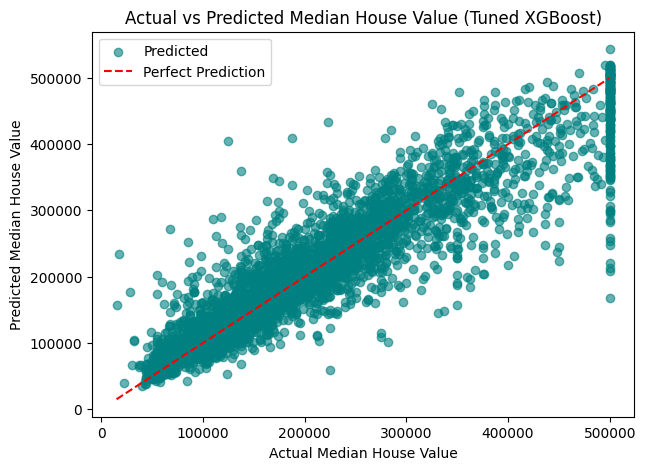

In [156]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

print("XGBoost Regressor with Hyperparameter Tuning")

# -------------------------
# Step 1: Define hyperparameter grid
# -------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],       # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],        # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5, 6, 8, 10],               # Maximum tree depth
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],         # Fraction of samples used per tree (prevents overfitting)
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used per tree
    'min_child_weight': [1, 3, 5, 7],               # Minimum sum of instance weight in a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.5]               # Minimum loss reduction required for a split
}

# -------------------------
# Step 2: Initialize XGBoost regressor
# -------------------------
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# -------------------------
# Step 3: Set up RandomizedSearchCV
# -------------------------
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,               # Number of random parameter combinations to try
    scoring='r2',            # Optimize R² score
    cv=3,                    # 3-fold cross-validation
    verbose=1,               # Show progress
    random_state=42,
    n_jobs=-1                # Use all CPU cores
)

# -------------------------
# Step 4: Clean column names for XGBoost
# -------------------------
# XGBoost may fail if column names contain special characters like '<' or '>'
X_train.columns = X_train.columns.str.replace('[<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[<>]', '', regex=True)

# -------------------------
# Step 5: Fit RandomizedSearchCV on training data
# -------------------------
random_search.fit(X_train, y_train)

# -------------------------
# Step 6: Retrieve best hyperparameters and estimator
# -------------------------
print("\nBest Parameters Found:")
print(random_search.best_params_)

best_xgb = random_search.best_estimator_

# -------------------------
# Step 7: Make predictions on the test set
# -------------------------
y_pred_xgb = best_xgb.predict(X_test)

# -------------------------
# Step 8: Evaluate model performance
# -------------------------
print("\nModel Performance Metrics:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# Approximate prediction accuracy (for interpretability)
accuracies_xgb = 100 * (1 - np.abs(y_test - y_pred_xgb) / y_test)
accuracy_xgb = np.mean(accuracies_xgb)
print(f"Average Prediction Accuracy: {accuracy_xgb:.2f}%")

# -------------------------
# Step 9: Visualize Actual vs Predicted values
# -------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_xgb, color='teal', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (Tuned XGBoost)")
plt.legend()
plt.show()

In [157]:
import joblib

# Save the tuned XGBoost model
joblib.dump(best_xgb, 'tuned_xgboost_regressor_model.pkl')

print("Tuned XGBoost Regressor model saved successfully!")

Tuned XGBoost Regressor model saved successfully!


# LightGBM Regressor

LightGBM Regressor Evaluation
R² Score: 0.8373
MAE: 30980.22
MSE: 2131831323.87
RMSE: 46171.76
Average Prediction Accuracy: 82.29%


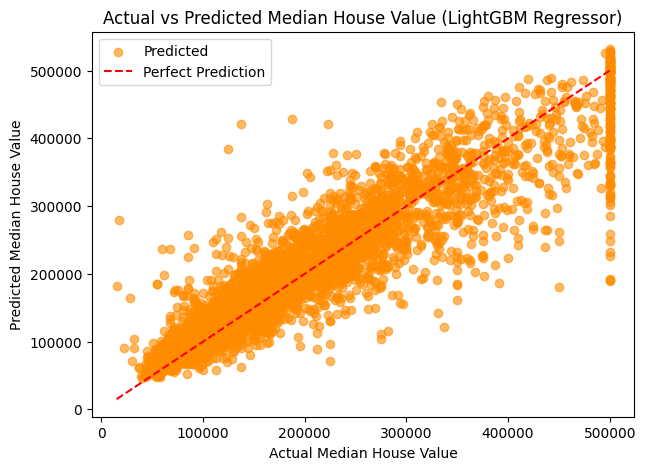

In [158]:
# -------------------------
# Step 0: Import required libraries
# -------------------------
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("LightGBM Regressor Evaluation")

# -------------------------
# Step 1: Clean column names
# -------------------------
# LightGBM may fail or give warnings if column names contain spaces or special characters
X_train.columns = (
    X_train.columns.str.replace(r'\s+', '_', regex=True)
                    .str.replace('[<>]', '', regex=True)
)
X_test.columns = (
    X_test.columns.str.replace(r'\s+', '_', regex=True)
                   .str.replace('[<>]', '', regex=True)
)

# -------------------------
# Step 2: Initialize LightGBM Regressor with baseline parameters
# -------------------------
lgbm = LGBMRegressor(
    n_estimators=300,       # Number of boosting trees
    learning_rate=0.05,     # Step size shrinkage to prevent overfitting
    num_leaves=31,          # Maximum number of leaves in one tree
    random_state=42,        # Ensure reproducibility
    force_row_wise=True,    # Avoid threading warnings
    verbose=-1              # Suppress LightGBM info messages
)

# -------------------------
# Step 3: Train the model on training data
# -------------------------
lgbm.fit(X_train, y_train)

# -------------------------
# Step 4: Make predictions on the test set
# -------------------------
y_pred_lgbm = lgbm.predict(X_test)

# -------------------------
# Step 5: Evaluate model performance using standard regression metrics
# -------------------------
r2 = r2_score(y_test, y_pred_lgbm)                  # Coefficient of determination
mae = mean_absolute_error(y_test, y_pred_lgbm)     # Mean absolute error
mse = mean_squared_error(y_test, y_pred_lgbm)      # Mean squared error
rmse = np.sqrt(mse)                                # Root mean squared error

# Approximate prediction accuracy (for interpretability)
accuracy_lgbm = 100 * (1 - np.abs(y_test - y_pred_lgbm) / y_test).mean()

# Print evaluation results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Average Prediction Accuracy: {accuracy_lgbm:.2f}%")

# -------------------------
# Step 6: Visualize Actual vs Predicted values
# -------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lgbm, color='darkorange', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (LightGBM Regressor)")
plt.legend()
plt.show()


#LightGBM Regressor with Hyperparameter Tuning

LightGBM Regressor with Hyperparameter Tuning
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Hyperparameters Found:
{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 60, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7}

Model Performance Metrics:
R² Score: 0.8484
MAE: 29601.66
MSE: 1986363474.62
RMSE: 44568.64
Average Prediction Accuracy: 83.19%


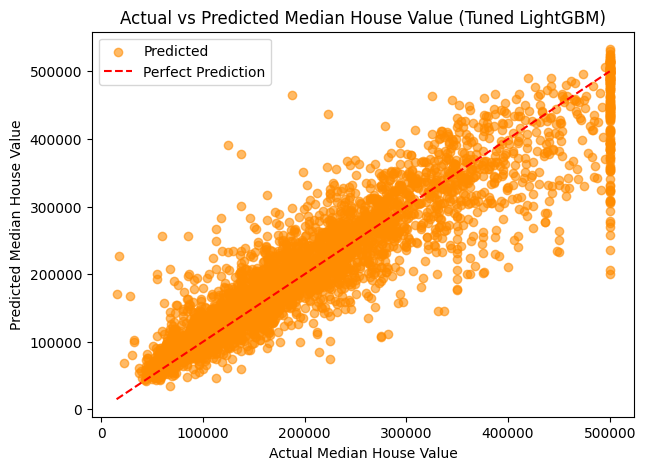

In [159]:
# -------------------------
# Step 0: Import required libraries
# -------------------------
from lightgbm import LGBMRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("LightGBM Regressor with Hyperparameter Tuning")

# -------------------------
# Step 1: Clean column names
# -------------------------
# LightGBM may fail or warn if columns contain spaces or special characters
X_train.columns = X_train.columns.str.replace(r'\s+', '_', regex=True).str.replace('[<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'\s+', '_', regex=True).str.replace('[<>]', '', regex=True)

# -------------------------
# Step 2: Define base model
# -------------------------
lgbm = LGBMRegressor(random_state=42, verbose=-1)

# -------------------------
# Step 3: Define hyperparameter grid for tuning
# -------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 50, 60],
    'max_depth': [-1, 5, 8, 10, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1]
}

# -------------------------
# Step 4: Setup RandomizedSearchCV
# -------------------------
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,            # Number of parameter combinations to try
    scoring='r2',         # Optimize R² score
    cv=3,                 # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all CPU cores
)

# -------------------------
# Step 5: Fit RandomizedSearchCV
# -------------------------
random_search.fit(X_train, y_train)

# -------------------------
# Step 6: Retrieve best model and parameters
# -------------------------
best_lgbm = random_search.best_estimator_
print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

# -------------------------
# Step 7: Make predictions on the test set
# -------------------------
y_pred_lgbm = best_lgbm.predict(X_test)

# -------------------------
# Step 8: Evaluate model performance
# -------------------------
r2 = r2_score(y_test, y_pred_lgbm)
mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mse)
accuracy_lgbm = 100 * (1 - np.abs(y_test - y_pred_lgbm) / y_test).mean()

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Average Prediction Accuracy: {accuracy_lgbm:.2f}%")

# -------------------------
# Step 9: Visualize Actual vs Predicted
# -------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lgbm, color='darkorange', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (Tuned LightGBM)")
plt.legend()
plt.show()


In [160]:
import joblib

# Save the best LightGBM model
joblib.dump(best_lgbm, 'tuned_lightgbm_regressor_model.pkl')

print("Tuned LightGBM Regressor model saved successfully!")

Tuned LightGBM Regressor model saved successfully!


# California Housing Prediction: Model Comparison

The table below summarizes the performance of different regression models on the California Housing dataset. Metrics include **R² Score, MAE, MSE, RMSE**, and **Average Prediction Accuracy**.

| Model                           | R² Score | MAE       | MSE           | RMSE      | Avg Prediction Accuracy |
|---------------------------------|----------|-----------|---------------|-----------|------------------------|
| Linear Regression               | 0.4589   | 62,990.87 | 7,091,157,771 | 84,209.01 | 60.94%                 |
| Multiple Linear Regression      | 0.5749   | 51,480.58 | 5,570,863,368 | 74,638.22 | 69.56%                 |
| Multiple Linear Regression (Tuned)| 0.5749 | 51,480.58 | 5,570,863,368 | 74,638.22 | 69.56%                 |
| Random Forest Regressor         | 0.8102   | 32,260.93 | 2,486,770,049 | 49,867.52 | 81.73%                 |
| Random Forest Regressor (Tuned)| N/A      | N/A       | N/A           | N/A       | N/A%                   |
| XGBoost Regressor               | 0.7992   | 34,635.79 | 2,631,931,258 | 51,302.35 | 80.40%                 |
| XGBoost Regressor (Tuned)      | 0.8440   | 29,631.93 | 2,043,600,729 | 45,206.20 | 83.18%                 |
| LightGBM Regressor              | 0.8373   | 30,980.22 | 2,131,831,324 | 46,171.76 | 82.29%                 |
| LightGBM Regressor (Tuned)     | 0.8484   | 29,601.66 | 1,986,363,475 | 44,568.64 | 83.19%                 |

---

## Observations:

- Linear models provide a baseline but often underperform due to their inability to capture complex non-linear relationships.  
- Random Forest and gradient boosting models (XGBoost, LightGBM) show better performance due to ensemble learning.  
- Hyperparameter tuning improves XGBoost and LightGBM, achieving higher R² and lower errors. (Random Forest tuned metrics not available yet.)  
- Tuned models are generally the best choice for California housing predictions.  
- Feature importance analysis helps identify which variables most influence the median house value.
